<a href="https://colab.research.google.com/github/aliwagdy2580/NLP/blob/aliwagdy2580-patch-1/Classifying_movie_reviews_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying movie reviews from scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
import re
import string
import html
import unicodedata

import nltk
nltk.download('punkt')
from nltk import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

load data from URL

In [2]:
from pathlib import Path
import os
DATA_PATH=Path('./data/')# make file on colab with name -->data
DATA_PATH.mkdir(exist_ok=True) #To make sure the file exists

if not os.path.exists('./data/aclImdb'):
    #this commend like linux
    !curl -O http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz # to load data from URL
    !tar -xf aclImdb_v1.tar.gz -C {DATA_PATH}


The data is already split into train/test. Moreover, we have 3 class folders:

- pos

- neg

- unsup (no specific label)

In [3]:
CLASS=['neg','pos']
PATH=Path('./data/aclImdb')
def get_text(path):
  text,labels=[],[]
  for idx,label in enumerate(CLASS):
    for fname in (path/label).glob('*.*'):
      text.append(fname.open('r',encoding='utf-8').read()) 
      labels.append(idx)
  
  return text,labels


In [4]:
train_text,train_labels=get_text(PATH/'train')
test_text,test_labels=get_text(PATH/'test')

In [5]:
for i in train_text[:3]:
  print(i)
  print('\n')

I should have listened. I was warned, and still, I paid money for this, after reading all the reviews, after knowing the original is "so bad it's good", and that part 2 does not fit into that category at all, still, even then, I couldn't resist. Exactly what happened here? Part one was Hilarious, it had so much politically incorrectness, and other Crazy, Fat Entertainment, and this one, there just couldn't possibly be a worse sequel on God's green earth, not Basket Case 2, hell, not even Troll 2. This is truly the worst sequel in history and that's really saying something considering the groundbreaking, bottom of the barrel qualities of the original. Criminally Insane part 2 was just a completely different brand of bad. Shot on Video, zero score, zero entertainment value, 1/3 consists of flashbacks of the original, and on top of all that, crazy, fat Ethel has lost a portion of her girth. I mean, honestly, is this some kind of sick joke?!? Thank's a lot, Nick Milliard. 1/1


This film f

In [6]:
train_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

## So what it takes to go from the raw form to the prepared form?

__A - Text preprocessing__

1- Data sequencing: each sentence --> sequence (list) of words

2- Data cleaning: This step varies from task to task. For some tasks it's better to remove special characters and punctuations, for other they are critical (emotiocons). Good for perfromance.

3- Text normalization: in general text morphology is a big issue in NLP. Upper and lower cases, stemming and lemmatization, ...etc. Again it's task dependent.

4- Padding (model dependent): Dense and CNN. RNN can skip this step.

__B- Text preparation__

5- Binarization/vectorization/digitization: transform words into numbers according to a vocab index.

# text preprocessing

### Manual (split on white spaces)

In [7]:
s=train_text[0].split()
s

['I',
 'should',
 'have',
 'listened.',
 'I',
 'was',
 'warned,',
 'and',
 'still,',
 'I',
 'paid',
 'money',
 'for',
 'this,',
 'after',
 'reading',
 'all',
 'the',
 'reviews,',
 'after',
 'knowing',
 'the',
 'original',
 'is',
 '"so',
 'bad',
 "it's",
 'good",',
 'and',
 'that',
 'part',
 '2',
 'does',
 'not',
 'fit',
 'into',
 'that',
 'category',
 'at',
 'all,',
 'still,',
 'even',
 'then,',
 'I',
 "couldn't",
 'resist.',
 'Exactly',
 'what',
 'happened',
 'here?',
 'Part',
 'one',
 'was',
 'Hilarious,',
 'it',
 'had',
 'so',
 'much',
 'politically',
 'incorrectness,',
 'and',
 'other',
 'Crazy,',
 'Fat',
 'Entertainment,',
 'and',
 'this',
 'one,',
 'there',
 'just',
 "couldn't",
 'possibly',
 'be',
 'a',
 'worse',
 'sequel',
 'on',
 "God's",
 'green',
 'earth,',
 'not',
 'Basket',
 'Case',
 '2,',
 'hell,',
 'not',
 'even',
 'Troll',
 '2.',
 'This',
 'is',
 'truly',
 'the',
 'worst',
 'sequel',
 'in',
 'history',
 'and',
 "that's",
 'really',
 'saying',
 'something',
 'considering

# NLTK 

So far, we have split the words using manual approaches (white spaces mainly).

Is there more mature method?

Actually there is: __tokenizers__

The most basic tokenizers take care of punctuation 

NLTK can be used for that.

## Sentence tokenization

Before we dive into words splitting, let's talk a little about sentence tokenization. Sometimes, the data comes in very long bult of text, a document or long paragraphs for example. 

In most NLP models, such long sequences are not desirable (forgetting effect).


`sent_tokenize` can be used to tokenize into shorter sequences, mapped to sentences as we know it. This tokenization is mostly driven by punctuations like full stop.

In [8]:
s=train_text[0]
s

'I should have listened. I was warned, and still, I paid money for this, after reading all the reviews, after knowing the original is "so bad it\'s good", and that part 2 does not fit into that category at all, still, even then, I couldn\'t resist. Exactly what happened here? Part one was Hilarious, it had so much politically incorrectness, and other Crazy, Fat Entertainment, and this one, there just couldn\'t possibly be a worse sequel on God\'s green earth, not Basket Case 2, hell, not even Troll 2. This is truly the worst sequel in history and that\'s really saying something considering the groundbreaking, bottom of the barrel qualities of the original. Criminally Insane part 2 was just a completely different brand of bad. Shot on Video, zero score, zero entertainment value, 1/3 consists of flashbacks of the original, and on top of all that, crazy, fat Ethel has lost a portion of her girth. I mean, honestly, is this some kind of sick joke?!? Thank\'s a lot, Nick Milliard. 1/1'

In [9]:
nltk.tokenize.sent_tokenize(s)

['I should have listened.',
 'I was warned, and still, I paid money for this, after reading all the reviews, after knowing the original is "so bad it\'s good", and that part 2 does not fit into that category at all, still, even then, I couldn\'t resist.',
 'Exactly what happened here?',
 "Part one was Hilarious, it had so much politically incorrectness, and other Crazy, Fat Entertainment, and this one, there just couldn't possibly be a worse sequel on God's green earth, not Basket Case 2, hell, not even Troll 2.",
 "This is truly the worst sequel in history and that's really saying something considering the groundbreaking, bottom of the barrel qualities of the original.",
 'Criminally Insane part 2 was just a completely different brand of bad.',
 'Shot on Video, zero score, zero entertainment value, 1/3 consists of flashbacks of the original, and on top of all that, crazy, fat Ethel has lost a portion of her girth.',
 'I mean, honestly, is this some kind of sick joke?!?',
 "Thank's a l

## Words tokenization


In [10]:
from nltk import word_tokenize
word_tokenize(s)

['I',
 'should',
 'have',
 'listened',
 '.',
 'I',
 'was',
 'warned',
 ',',
 'and',
 'still',
 ',',
 'I',
 'paid',
 'money',
 'for',
 'this',
 ',',
 'after',
 'reading',
 'all',
 'the',
 'reviews',
 ',',
 'after',
 'knowing',
 'the',
 'original',
 'is',
 '``',
 'so',
 'bad',
 'it',
 "'s",
 'good',
 "''",
 ',',
 'and',
 'that',
 'part',
 '2',
 'does',
 'not',
 'fit',
 'into',
 'that',
 'category',
 'at',
 'all',
 ',',
 'still',
 ',',
 'even',
 'then',
 ',',
 'I',
 'could',
 "n't",
 'resist',
 '.',
 'Exactly',
 'what',
 'happened',
 'here',
 '?',
 'Part',
 'one',
 'was',
 'Hilarious',
 ',',
 'it',
 'had',
 'so',
 'much',
 'politically',
 'incorrectness',
 ',',
 'and',
 'other',
 'Crazy',
 ',',
 'Fat',
 'Entertainment',
 ',',
 'and',
 'this',
 'one',
 ',',
 'there',
 'just',
 'could',
 "n't",
 'possibly',
 'be',
 'a',
 'worse',
 'sequel',
 'on',
 'God',
 "'s",
 'green',
 'earth',
 ',',
 'not',
 'Basket',
 'Case',
 '2',
 ',',
 'hell',
 ',',
 'not',
 'even',
 'Troll',
 '2',
 '.',
 'This',
 

## Stop words

Not every word contribute to the semantics or meaning. Some words like 'the', 'to', 'on', 'we',...etc are not important for many tasks, specially classification tasks.

Such words are called stop words


In [11]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Putting all the pipeline together:

In [12]:
def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))


def remove_non_ascii(text):
    """Remove non-ASCII characters from list of tokenized words"""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  
def to_lowercase(text):
  return text.lower()

def remove_punctuation(text):
  #This translation mapping is then used for replacing a character to its mapped character when used in translate() method.
  translator=str.maketrans('','',string.punctuation)
  return text.translate(translator)

def replace_numbers(text):
  """Replace all interger occurrences in list of tokenized words with textual representation"""
  return re.sub(r'\d+','',text)

def remove_whitespace(text):
  return text.strip()

def text2words(text):
  return word_tokenize(text)

def remove_stopwords(words,stop_words):
  return [word for word in words if word not in stop_words]

def stem_words(words):
  stemmer=PorterStemmer()
  return ' '.join([stemmer.stem(word) for word in words])

def lemmatize_words(words):
    """Lemmatize words in text"""

    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in text"""

    lemmatizer = WordNetLemmatizer()
    return  [lemmatizer.lemmatize(word, pos='v') for word in words]

def normalize_text(text):
    text = remove_special_chars(text)
    text = remove_non_ascii(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    words = remove_stopwords(words, stop_words)
    #words = stem_words(words)# Either stem ovocar lemmatize
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)

    return ' '.join(words)


In [13]:
normalize_text(train_text[0])

'listen warn still pay money read review know original bad good part fit category still even couldnt resist exactly happen part one hilarious much politically incorrectness crazy fat entertainment one couldnt possibly worse sequel god green earth basket case hell even troll truly worst sequel history thats really say something consider groundbreaking bottom barrel quality original criminally insane part completely different brand bad shoot video zero score zero entertainment value consist flashback original top crazy fat ethel lose portion girth mean honestly kind sick joke thank lot nick milliard'

Now let's apply this on the whole corpus:d

In [14]:
def normalize_corpus(corpus):
  return [normalize_text(t) for t in corpus]

In [15]:
train_data=normalize_corpus(train_text)
test_data=normalize_corpus(test_text)

In [16]:
train_data[1]

'film feature two favorite guilty pleasure sure effect laughable story confuse watch hasselhoff knight rider day always fun especially like old hotel use shoot add little suspense muster give'

### Text preparation
The preparation phase includes transforming text into binary/integer/digital format

For that we need a vocabulary vector:

## Vocab and inverse vocab
Vocabulary is a mapping (dict) from words to indices (integers). It represents ALL the words in a language. But it's hard to get ALL words, so we count only what we have in a dataset/corpus.

Since we don't account for all words, we might encounter Out-Of-Vocab words which we dont know a mapping for. So we usually reserve a special token index for UNKnown words.

#Manual

In [17]:
texts=train_data+test_data
# for text in texts && for word in text.split()
words=[word for text in texts for word in text.split()]
corp=sorted(list(set(words)))


### build vocabulary manual

In [18]:
str2idx={w:i for i,w in enumerate(corp)}
idx2str={i:w for i,w in enumerate(corp)}
len(str2idx)

140832

If we want word_counts and ordered dict str2idx (same in keras Tokenizer)

In [19]:
from collections import Counter
word_counts=Counter(words)
v_s=sorted(word_counts.items() , key=lambda x:x[1] , reverse=True)
str2idx={key:val for key,val in v_s}
idx2str={val:key for key,val in v_s}


# Binarization/vecotrization
We can use any given vocab dict to binarize text and come back. This maps exactly to keras texts_to_sequences

In [20]:
docs = ['cartoon movie show', 'hello world']
l = [[str2idx[w] for w in s.split()] for s in docs]
l

[[1483, 100955, 21680], [153, 7484]]

### Keras Tokenizer
The keras tokenizer can be used to convert a sequence of words into integers.

It builds an internal vocab, called word_index.

To use a tokenizer, you must first fit it to the texts. It learns some stats about the text this way.

**It's advised to fit the tokenizer on all the data (train+test) to avoid OOV**

This is not "cheating" and not leading to overfitting, as we don't use the test labels, but only the raw text features (unsupervised)

In [21]:
from keras.preprocessing.text import Tokenizer

texts = train_data + test_data # This must be list of strings: 
texts[:10]

['listen warn still pay money read review know original bad good part fit category still even couldnt resist exactly happen part one hilarious much politically incorrectness crazy fat entertainment one couldnt possibly worse sequel god green earth basket case hell even troll truly worst sequel history thats really say something consider groundbreaking bottom barrel quality original criminally insane part completely different brand bad shoot video zero score zero entertainment value consist flashback original top crazy fat ethel lose portion girth mean honestly kind sick joke thank lot nick milliard',
 'film feature two favorite guilty pleasure sure effect laughable story confuse watch hasselhoff knight rider day always fun especially like old hotel use shoot add little suspense muster give',
 'wish could give movie zero even lower sadly thats deserve honestly never walk movie one dreadfully awful couldnt stand another minute pleaseplease please sake mankind skip movie want hot lesbian 

In [22]:
tok = Tokenizer()
tok.fit_on_texts(texts)#build the vocabulary from my dataset

In [23]:
#to show the vocabulary
tok.word_index

{'movie': 1,
 'film': 2,
 'one': 3,
 'make': 4,
 'like': 5,
 'see': 6,
 'get': 7,
 'time': 8,
 'good': 9,
 'character': 10,
 'watch': 11,
 'go': 12,
 'even': 13,
 'story': 14,
 'think': 15,
 'would': 16,
 'really': 17,
 'show': 18,
 'scene': 19,
 'well': 20,
 'look': 21,
 'say': 22,
 'much': 23,
 'know': 24,
 'end': 25,
 'people': 26,
 'great': 27,
 'bad': 28,
 'also': 29,
 'give': 30,
 'first': 31,
 'take': 32,
 'act': 33,
 'play': 34,
 'love': 35,
 'way': 36,
 'dont': 37,
 'come': 38,
 'thing': 39,
 'find': 40,
 'could': 41,
 'life': 42,
 'seem': 43,
 'work': 44,
 'many': 45,
 'plot': 46,
 'actor': 47,
 'want': 48,
 'two': 49,
 'never': 50,
 'year': 51,
 'try': 52,
 'best': 53,
 'little': 54,
 'ever': 55,
 'better': 56,
 'man': 57,
 'still': 58,
 'feel': 59,
 'part': 60,
 'something': 61,
 'lot': 62,
 'back': 63,
 'interest': 64,
 'im': 65,
 'director': 66,
 'real': 67,
 'guy': 68,
 'performance': 69,
 'doesnt': 70,
 'use': 71,
 'didnt': 72,
 'woman': 73,
 'though': 74,
 'funny': 75,

We could fit the tokenizer with an OOV token, which will be added to word_index and given

In [24]:
tok=Tokenizer(oov_token='UNK')
tok.fit_on_texts(texts)

In [25]:
tok.word_index['UNK']

1

In [26]:
#To specify the number of words on from vocabulary
tok=Tokenizer(num_words=1000)
tok.fit_on_texts(texts)

In [27]:
docs = ['cartoon movie show', 'hello world']
docs = [s.split() for s in docs]
l = tok.texts_to_sequences(docs)
l

[[686, 1, 18], [95]]

In [28]:
from keras.preprocessing.sequence import pad_sequences
maxlen=max([len(t) for t in texts])
l=np.array(pad_sequences(l,maxlen=maxlen,padding='post',truncating='post'))

In [29]:
l.shape

(2, 8696)

#BoW with keras Tokenizer
We can use keras tokenizer to build a simple BoW.

The rows = number of sentences/documents

The #columns = number of words in the vocab

Each entry can encode different modes:

binary: Whether or not each word is present in the document. This is the default.

count: The count of each word in the document.

tfidf: The Text Frequency-Inverse DocumentFrequency (TF-IDF) scoring for each word in the document (more on that later).

freq: The frequency of each word as a ratio of words within each document.

In [30]:
tok=Tokenizer(oov_token='UNK')
tok.fit_on_texts(texts)
bow=tok.texts_to_matrix(texts[:10],mode='count')
bow.shape

(10, 140834)

In [31]:
bow

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 9., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 7., ..., 0., 0., 0.]])

## BoW with sklearn
The BoW model above can be also produced using sklearn

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
vectorizer.fit(texts)#build vocab
bow=vectorizer.transform(texts[:10])
bow.shape


(10, 140805)

In [33]:
#show the vocabulary
#vectorizer.vocabulary_  

In [34]:
bow

<10x140805 sparse matrix of type '<class 'numpy.int64'>'
	with 925 stored elements in Compressed Sparse Row format>

In [35]:
bow = bow.toarray()
print(bow.shape)
print(bow)

(10, 140805)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Notes:

We don't have control on the vocab size unlike keras

The matrix is (CSR) (Compressed Sparse Row), which is more compact representation for matrices with many zeros. The BoW is very sparse, it's a good way to represent it. You can easily recover the array when needed using toarray()

Vocab is all lower case, and punctuation is ignored. All those are configurable from sklearn



# TF-IDF

TFIDF (Term Frequency - Inverse Document) is a way to adjust those counts:

TF: #mentions within a document
IDF: #mentions across all docs (same as the counts before)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(texts)
bow = vectorizer.transform(texts[:10])
bow.shape

(10, 140805)

In [37]:
bow.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# get dataset

In [38]:
trn_texts,trn_labels = get_text(PATH/'train')
tst_texts,tst_labels = get_text(PATH/'test')

In [39]:
trn_texts = normalize_corpus(trn_texts)
tst_texts = normalize_corpus(tst_texts)

# BoW
Binary features

We will use the tokenizer of keras

In [40]:
from keras.preprocessing.text import Tokenizer
vocab_size=10000
epochs=20
batch_size=512
tok=Tokenizer(num_words=vocab_size,oov_token='UNK')
tok.fit_on_texts(texts)

x_train=tok.texts_to_matrix(train_data,mode='count')
x_test=tok.texts_to_matrix(test_data,mode='count')

In [41]:
y_train=np.array(train_labels)
y_test=np.array(test_labels)

#model

In [42]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(vocab_size,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics='accuracy')

In [44]:
partial_x_train=x_train[:15000]
x_val=x_train[15000:]

partial_y_train=y_train[:15000]
y_val=y_train[15000:]

In [45]:
history=model.fit(partial_x_train,
          partial_y_train,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 17s 59ms/step - loss: 0.5707 - accuracy: 0.7406 - val_loss: 1.2991 - val_accuracy: 0.0125
Epoch 2/20
30/30 [==============================] - 2s 54ms/step - loss: 0.3353 - accuracy: 0.8662 - val_loss: 0.9734 - val_accuracy: 0.4137
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2214 - accuracy: 0.9252 - val_loss: 0.7920 - val_accuracy: 0.6056
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1580 - accuracy: 0.9515 - val_loss: 0.6690 - val_accuracy: 0.7053
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1205 - accuracy: 0.9624 - val_loss: 0.9568 - val_accuracy: 0.6217
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0952 - accuracy: 0.9719 - val_loss: 0.9220 - val_accuracy: 0.6616
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0700 - accuracy: 0.9805 - val_loss: 0.9329 - val_accuracy: 0.6847
Epoch 8/20
3

In [46]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

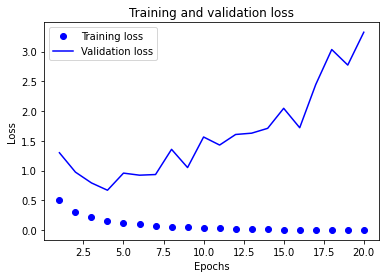

In [47]:
history_dict = history.history
history_dict.keys()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

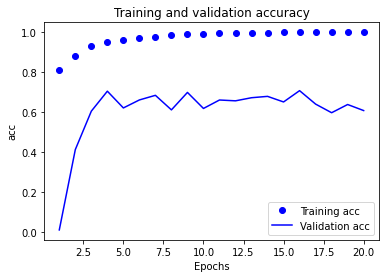

In [48]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

##Let's compare to the Keras dataset:
NOtice that, we could directly use the function sequences_to_matrix to obtain the BoW from binarized corpus:

In [49]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

vocab_sz = 10000
tok = Tokenizer(num_words=vocab_sz, oov_token='UNK')
tok.fit_on_texts(trn_texts + tst_texts)
#vocab_sz = len(tok.word_index)

# Extract binary BoW features
x_train = tok.sequences_to_matrix(train_data, mode='binary')
x_test = tok.sequences_to_matrix(test_data, mode='binary')
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics='accuracy')
			  
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


Epoch 1/20
30/30 [==============================] - 2s 55ms/step - loss: 0.5826 - accuracy: 0.7045 - val_loss: 0.4054 - val_accuracy: 0.8387
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3159 - accuracy: 0.8986 - val_loss: 0.3000 - val_accuracy: 0.8888
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2259 - accuracy: 0.9309 - val_loss: 0.2769 - val_accuracy: 0.8924
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1678 - accuracy: 0.9521 - val_loss: 0.3123 - val_accuracy: 0.8714
Epoch 5/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1473 - accuracy: 0.9545 - val_loss: 0.3019 - val_accuracy: 0.8805
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1180 - accuracy: 0.9651 - val_loss: 0.2916 - val_accuracy: 0.8860
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0930 - accuracy: 0.9743 - val_loss: 0.3339 - val_accuracy: 0.8780
Epoch 8/20
30

/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

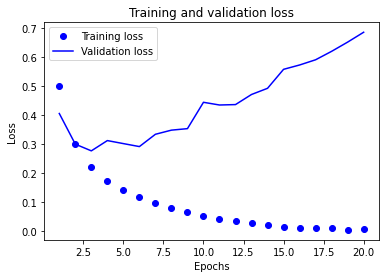

In [50]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

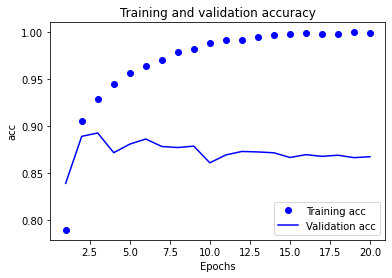

In [51]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

#So what happened?
As you can see, the val loss curves with Keras data has much higher (~87%) accuracy than the one we used.

The reason is that we assumed the data is shuffled!

If you revise the get_texts function we implemented, it takes all the class data in sequence.

Our train/val split did not contain any shuffling.

To fix this, we could manually shuffle:

 we could use sklearn train_test_split function:

In [52]:
trn_texts,trn_labels = get_text(PATH/'train')
tst_texts,tst_labels = get_text(PATH/'test')

trn_texts = normalize_corpus(trn_texts)
tst_texts = normalize_corpus(tst_texts)



In [53]:
from sklearn.model_selection import train_test_split
vocab_sz = 10000
tok = Tokenizer(num_words=vocab_sz, oov_token='UNK')
tok.fit_on_texts(trn_texts + tst_texts)
#vocab_sz = len(tok.word_index)
# Extract binary BoW features
x_train = tok.sequences_to_matrix(train_data, mode='binary')
x_test = tok.sequences_to_matrix(test_data, mode='binary')
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

In [54]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(vocab_size,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics='accuracy')
			  
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 3s 51ms/step - loss: 0.6091 - accuracy: 0.6915 - val_loss: 0.4078 - val_accuracy: 0.8690
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.3455 - accuracy: 0.9025 - val_loss: 0.3344 - val_accuracy: 0.8719
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2408 - accuracy: 0.9275 - val_loss: 0.3274 - val_accuracy: 0.8678
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1963 - accuracy: 0.9377 - val_loss: 0.2855 - val_accuracy: 0.8845
Epoch 5/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1500 - accuracy: 0.9537 - val_loss: 0.2936 - val_accuracy: 0.8801
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1233 - accuracy: 0.9624 - val_loss: 0.2982 - val_accuracy: 0.8832
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1036 - accuracy: 0.9700 - val_loss: 0.3146 - val_accuracy: 0.8814
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

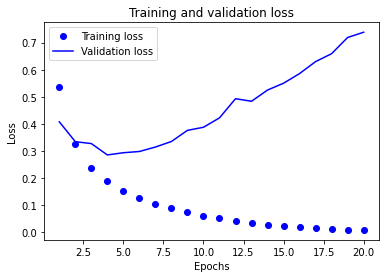

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

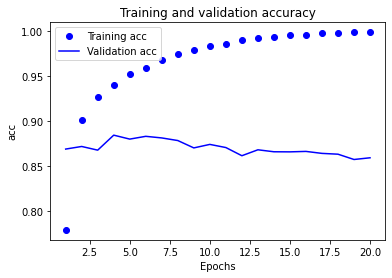

In [56]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

#Freq features





In [57]:
'''
trn_texts,trn_labels = get_texts(PATH/'train')
tst_texts,tst_labels = get_texts(PATH/'test')

trn_texts = normalize_corpus(trn_texts)
tst_texts = normalize_corpus(tst_texts)

vocab_sz = 10000
tok = Tokenizer(num_words=vocab_sz, oov_token='UNK')
tok.fit_on_texts(trn_texts + tst_texts)
#vocab_sz = len(tok.word_index)
'''
# Extract binary BoW features
x_train = tok.texts_to_matrix(trn_texts, mode='freq')
x_test = tok.texts_to_matrix(tst_texts, mode='freq')
y_train = np.asarray(trn_labels).astype('float32')
y_test = np.asarray(tst_labels).astype('float32')

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

In [58]:
x_train

array([[0.        , 0.1125    , 0.05      , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.05714286, 0.01428571, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.11009174, 0.00917431, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.02777778, 0.01388889, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03333333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04      , 0.08      , ..., 0.        , 0.        ,
        0.        ]])

In [59]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(vocab_size,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics='accuracy')
			  
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 3s 61ms/step - loss: 0.6906 - accuracy: 0.5719 - val_loss: 0.6811 - val_accuracy: 0.8044
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.6760 - accuracy: 0.8063 - val_loss: 0.6632 - val_accuracy: 0.8031
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.6556 - accuracy: 0.8264 - val_loss: 0.6388 - val_accuracy: 0.8185
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.6271 - accuracy: 0.8372 - val_loss: 0.6089 - val_accuracy: 0.8226
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.5934 - accuracy: 0.8421 - val_loss: 0.5750 - val_accuracy: 0.8275
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.5548 - accuracy: 0.8569 - val_loss: 0.5384 - val_accuracy: 0.8339
Epoch 7/20
30/30 [==============================] - 1s 44ms/step - loss: 0.5155 - accuracy: 0.8621 - val_loss: 0.5015 - val_accuracy: 0.8405
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

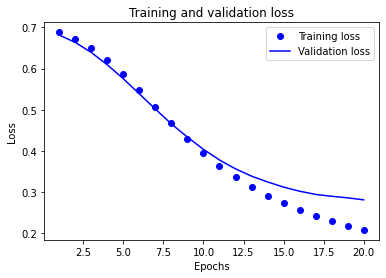

In [60]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

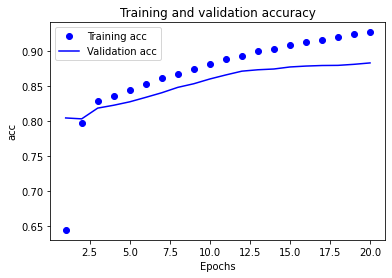

In [61]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()